<a href="https://colab.research.google.com/github/benikenbrahim/Machine-lerning/blob/main/dataClean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clean data en utlisant phyton

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import datetime as dt

lien de notre data : https://www.stats.govt.nz/information-releases/annual-enterprise-survey-2023-financial-year-provisional/

In [42]:
data = pd.read_csv('annual-enterprise-survey-2023-financial-year-provisional.csv')

part: Visualizations of data

In [43]:
print(data)

       Year Industry_aggregation_NZSIOC Industry_code_NZSIOC  \
0      2023                     Level 1                99999   
1      2023                     Level 1                99999   
2      2023                     Level 1                99999   
3      2023                     Level 1                99999   
4      2023                     Level 1                99999   
...     ...                         ...                  ...   
50980  2013                     Level 3                 ZZ11   
50981  2013                     Level 3                 ZZ11   
50982  2013                     Level 3                 ZZ11   
50983  2013                     Level 3                 ZZ11   
50984  2013                     Level 3                 ZZ11   

             Industry_name_NZSIOC               Units Variable_code  \
0                  All industries  Dollars (millions)           H01   
1                  All industries  Dollars (millions)           H04   
2                 

on vas voir les type de nos data:

In [44]:
data.dtypes

,0
Year,int64
Industry_aggregation_NZSIOC,object
Industry_code_NZSIOC,object
Industry_name_NZSIOC,object
Units,object
Variable_code,object
Variable_name,object
Variable_category,object
Value,object
Industry_code_ANZSIC06,object


on remarque que value est de type entier mais declare comme object danc il faut convertire son type :

In [45]:
#on va aficher les info de notre dataframe:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50985 entries, 0 to 50984
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Year                         50985 non-null  int64 
 1   Industry_aggregation_NZSIOC  50985 non-null  object
 2   Industry_code_NZSIOC         50985 non-null  object
 3   Industry_name_NZSIOC         50985 non-null  object
 4   Units                        50985 non-null  object
 5   Variable_code                50985 non-null  object
 6   Variable_name                50985 non-null  object
 7   Variable_category            50985 non-null  object
 8   Value                        50985 non-null  object
 9   Industry_code_ANZSIC06       50985 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


se qon remarque c'est que notre data est bien équilibrer et qona pas de missing data: 50985 element pour chaque élément.

In [46]:
#on verifie qona pas de missing data par ce qui suit:
data.isna().sum()

,0
Year,0
Industry_aggregation_NZSIOC,0
Industry_code_NZSIOC,0
Industry_name_NZSIOC,0
Units,0
Variable_code,0
Variable_name,0
Variable_category,0
Value,0
Industry_code_ANZSIC06,0


In [47]:
data.describe()

,Year
count,50985.000000
mean,2018.000000
std,3.162309
min,2013.000000
25%,2015.000000
50%,2018.000000
75%,2021.000000
max,2023.000000


In [48]:
#on vas convertir le type de value de objet au nombre:
data['Value'] = pd.to_numeric(data['Value'], errors = 'coerce')
print(data['Value'])
data['Value'].dtype

0        930995.0
1        821630.0
2         84354.0
3         25010.0
4        832964.0
           ...   
50980        52.0
50981        40.0
50982        12.0
50983         5.0
50984        46.0
Name: Value, Length: 50985, dtype: float64


dtype('float64')

Le type de value est bien transformer en float

In [49]:
#on va printer les doublon de notre data frame:
data.duplicated()
data.duplicated().sum()

np.int64(0)

danc ona aucun doublons

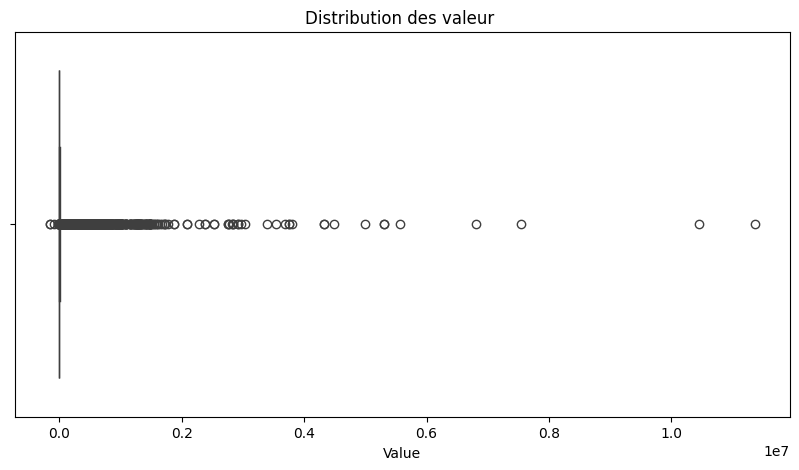

In [50]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=data["Value"])
plt.title("Distribution des valeur ")
plt.show()

#observation
la majorite des valeur se consentre pres de 0 .danc il faut nettoyer cela car la colone value presente une destribution tre asymetrique avec

In [51]:

print(data['Value'])

0        930995.0
1        821630.0
2         84354.0
3         25010.0
4        832964.0
           ...   
50980        52.0
50981        40.0
50982        12.0
50983         5.0
50984        46.0
Name: Value, Length: 50985, dtype: float64


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


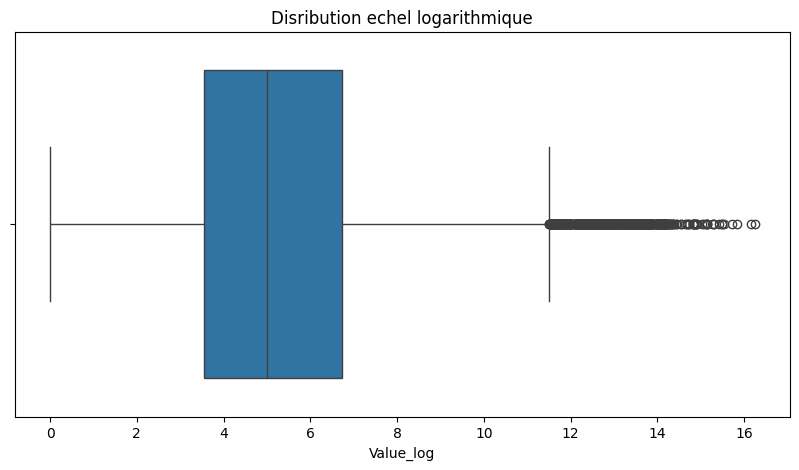

In [55]:
data['Value_log'] = np.log1p(data['Value'])
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['Value_log'])
plt.title("Disribution echel logarithmique")
plt.show()